In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow_datasets as tfds
from tensorflow.data.experimental import sample_from_datasets
from tensorflow.keras.layers import Activation, Dense, Dropout

tfkl = tfk.layers

**Preprocessing**

As typical, we'll start with the MNIST data. Recall from last time, we have to do some transformations and preprocessing on these images.

In [2]:
data, info = tfds.load('mnist', with_info=True)

In [3]:
preprocess = lambda d: (tf.cast(d["image"], tf.float32)/255, tf.one_hot(d["label"], depth=10))

ds_train = data["train"].map(preprocess).cache().batch(32)
ds_test = data["test"].map(preprocess).cache().batch(32)

In [4]:
img_shape = info.features['image'].shape

In [5]:
img_shape

(28, 28, 1)

**CNNs in TF Keras**

We'll use the Sequential class rely on new layer types that correspond to concepts we covered in lecture: Conv2D, AvgPool2D, MaxPool2D. 

Details such as kernel size, padding, strides and so on must be specified as args to these classes, where appropriate.

In [6]:
model = tfk.Sequential()
model.add(tfkl.Conv2D(filters = 1, kernel_size=(3,3), strides=(1,1), 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=(4,4)))
model.add(tfkl.Flatten())
model.add(tfkl.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 1)         10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 1)           0         
_________________________________________________________________
flatten (Flatten)            (None, 36)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                370       
Total params: 380
Trainable params: 380
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(ds_train, steps_per_epoch=20, epochs=20, validation_data=ds_test)

Epoch 1/20
20/20 [==============================] - 2s 79ms/step - loss: 2.7958 - val_loss: 2.6328
Epoch 2/20
20/20 [==============================] - 1s 43ms/step - loss: 2.5537 - val_loss: 2.4475
Epoch 3/20
20/20 [==============================] - 1s 40ms/step - loss: 2.3918 - val_loss: 2.3481
Epoch 4/20
20/20 [==============================] - 1s 37ms/step - loss: 2.3120 - val_loss: 2.2620
Epoch 5/20
20/20 [==============================] - 1s 37ms/step - loss: 2.2560 - val_loss: 2.1991
Epoch 6/20
20/20 [==============================] - 1s 37ms/step - loss: 2.1775 - val_loss: 2.1423
Epoch 7/20
20/20 [==============================] - 1s 37ms/step - loss: 2.0865 - val_loss: 2.0827
Epoch 8/20
20/20 [==============================] - 1s 37ms/step - loss: 2.0724 - val_loss: 2.0220
Epoch 9/20
20/20 [==============================] - 1s 41ms/step - loss: 1.9679 - val_loss: 1.9543
Epoch 10/20
20/20 [==============================] - 1s 38ms/step - loss: 1.9312 - val_loss: 1.8815
Epoch 11/

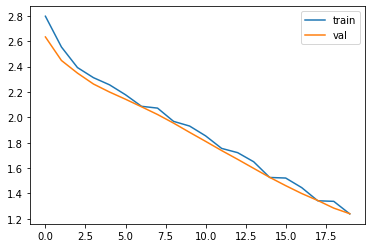

In [9]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])

Text(0.5, 0, 'Probability')

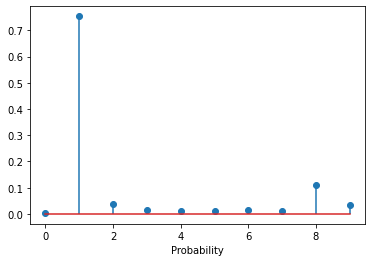

In [10]:
plt.stem(model.predict(ds_test.take(1))[9, :])
plt.xlabel("Digit")
plt.xlabel("Probability")

Which architectural hyperparameters might we change in the above?



**Exercise - Deep CNN**

Build and fit your own CNN model with 3 convolutional **modules**, where each one contains:
  * kernel convolution 
    * you pick number of kernels
    * you pick kernel shape/size
    * you pick activation
  * pooling
  * dropout

We'll use the Fashion MNIST dataset, a low-res collection of images of clothing.

In [16]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
images = images[:, :, :, np.newaxis]
labels = tf.one_hot(labels.astype(np.int32),10)

# optional - TF Datasets objects
# fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
# fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)

fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)

images1, labels1 = test
images1 = images1/255.0
images1 = images1[:, :, :, np.newaxis]
labels1 = tf.one_hot(labels1.astype(np.int32),10)

fmnist_test_ds = tf.data.Dataset.from_tensor_slices((images1, labels1)).shuffle(5000).batch(32)

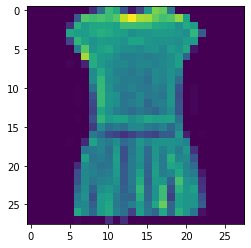

In [17]:
plt.imshow(images[3, :, :, :].squeeze())

In [18]:
model = tfk.Sequential()

# Block 1
model.add(tfkl.Conv2D(filters = 1, kernel_size= 2, strides= 2, 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=(2)))
model.add(Dropout(0.2))

# Block 2
model.add(tfkl.Conv2D(filters = 8, kernel_size= 2, strides= 1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=(2)))
model.add(Dropout(0.2))

# Block 3
model.add(tfkl.Conv2D(filters = 16, kernel_size= 2, strides= 1, 
                      padding="valid", activation='relu'))
model.add(tfkl.MaxPool2D(pool_size=(2)))
model.add(Dropout(0.2))

# Flatten
model.add(tfkl.GlobalMaxPool2D())
model.add(tfkl.Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 1)         5         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 1)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 1)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 8)           40        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 8)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 3, 8)           0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 16)         

In [20]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(fmnist_train_ds,batch_size=32,steps_per_epoch=20, epochs=20,validation_data=fmnist_test_ds)

Epoch 1/20
20/20 [==============================] - 1s 30ms/step - loss: 2.2993 - val_loss: 2.2982
Epoch 2/20
20/20 [==============================] - 1s 25ms/step - loss: 2.2939 - val_loss: 2.2940
Epoch 3/20
20/20 [==============================] - 1s 25ms/step - loss: 2.2896 - val_loss: 2.2891
Epoch 4/20
20/20 [==============================] - 1s 25ms/step - loss: 2.2788 - val_loss: 2.2820
Epoch 5/20
20/20 [==============================] - 0s 25ms/step - loss: 2.2755 - val_loss: 2.2742
Epoch 6/20
20/20 [==============================] - 1s 25ms/step - loss: 2.2647 - val_loss: 2.2632
Epoch 7/20
20/20 [==============================] - 1s 25ms/step - loss: 2.2582 - val_loss: 2.2502
Epoch 8/20
20/20 [==============================] - 1s 25ms/step - loss: 2.2359 - val_loss: 2.2338
Epoch 9/20
20/20 [==============================] - 0s 25ms/step - loss: 2.2140 - val_loss: 2.2140
Epoch 10/20
20/20 [==============================] - 1s 25ms/step - loss: 2.2202 - val_loss: 2.1969
Epoch 11/

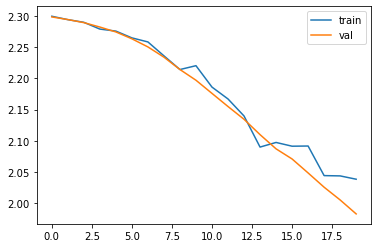

In [21]:
# plot
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])


#|**Exercise - Transfer Learning**



In [22]:
data, info = tfds.load('rock_paper_scissors', with_info=True)
train_data = data["train"].map(lambda x: (tf.cast(x["image"], tf.float32) / 255., tf.one_hot(x["label"], depth=3) )).batch(32)
test_data = data["train"].map(lambda x: (tf.cast(x["image"], tf.float32) / 255., tf.one_hot(x["label"], depth=3))).batch(32)

Shuffling and writing examples to /Users/JDR/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete148ULD/rock_paper_scissors-train.tfrecord


Shuffling and writing examples to /Users/JDR/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete148ULD/rock_paper_scissors-test.tfrecord


Dataset rock_paper_scissors downloaded and prepared to /Users/JDR/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [23]:
info.features['image'].shape

(300, 300, 3)

,image,label
0,,2 (scissors)
1,,2 (scissors)
2,,0 (rock)
3,,1 (paper)
4,,0 (rock)
5,,1 (paper)
6,,2 (scissors)
7,,1 (paper)
8,,2 (scissors)
9,,2 (scissors)

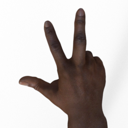
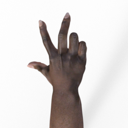
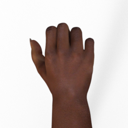
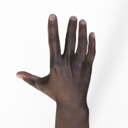
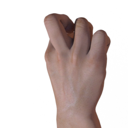
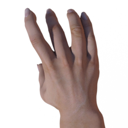
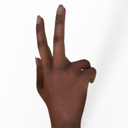
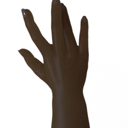
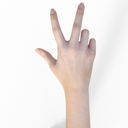
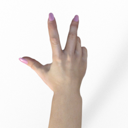

In [24]:
tfds.as_dataframe(data["train"].take(10), info)

# Exercise

1. Build a deep CNN model and train it for this binary classification task. Fit the model using the small dataset of 500 samples, *train_data*.

What accuracy can your model acheive on the training data?

In [25]:
df_train = data["train"].take(500)
df_train = df_train.map(lambda x: (tf.cast(x["image"], tf.float32) / 255.,tf.one_hot(x["label"], depth=3))).batch(32)

#Seperating labels and images
train_images, train_labels = next(iter(df_train))
test_images, test_labels = next(iter(test_data))

In [26]:
model = tfk.Sequential()

model.add(tfkl.Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_uniform', input_shape = [300,300, 3]))
model.add(tfkl.MaxPooling2D(2))

model.add(tfkl.Conv2D(32, 3, padding='same', kernel_initializer='he_uniform', activation='relu'))
model.add(tfkl.MaxPooling2D(2))

model.add(tfkl.Conv2D(64, 3, padding='same', kernel_initializer='he_uniform',activation='relu'))
model.add(tfkl.MaxPooling2D(2))

model.add(tfkl.Conv2D(128, 3, padding='same', kernel_initializer='he_uniform',activation='relu'))
model.add(tfkl.MaxPooling2D(2))

model.add(tfkl.Flatten())
model.add(tfkl.Dense(128, kernel_initializer='he_uniform',activation = 'relu'))
model.add(tfkl.Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 37, 37, 128)      

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,  horizontal_flip=True)
it_gen = datagen.flow(train_images, train_labels, batch_size=32)


In [29]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


steps = int(train_images.shape[0] / 32)
results = model.fit(it_gen,epochs = 20,steps_per_epoch=steps, validation_data = (test_images, test_labels))

Epoch 1/20
1/1 [==============================] - 1s 506ms/step - loss: 1.5662 - accuracy: 0.2500 - val_loss: 40.2357 - val_accuracy: 0.4688
Epoch 2/20
1/1 [==============================] - 0s 387ms/step - loss: 39.9933 - accuracy: 0.4688 - val_loss: 10.5662 - val_accuracy: 0.4688
Epoch 3/20
1/1 [==============================] - 0s 394ms/step - loss: 10.5165 - accuracy: 0.4688 - val_loss: 12.5532 - val_accuracy: 0.2500
Epoch 4/20
1/1 [==============================] - 0s 411ms/step - loss: 12.4496 - accuracy: 0.2500 - val_loss: 4.7966 - val_accuracy: 0.2500
Epoch 5/20
1/1 [==============================] - 0s 481ms/step - loss: 4.7734 - accuracy: 0.2500 - val_loss: 2.1075 - val_accuracy: 0.2812
Epoch 6/20
1/1 [==============================] - 0s 403ms/step - loss: 2.1149 - accuracy: 0.2812 - val_loss: 1.6198 - val_accuracy: 0.4688
Epoch 7/20
1/1 [==============================] - 0s 406ms/step - loss: 1.6849 - accuracy: 0.4688 - val_loss: 1.2902 - val_accuracy: 0.4688
Epoch 8/20
1/1

 2. Now use transfer learning by incorporating the pretrained VGG16 model.

In [30]:
from tensorflow.keras.applications import VGG16

In [31]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(300,300,3))

58892288/58889256 [==============================] - 3s 0us/step


Build a Sequential model, using our VGG16 base. Make sure the freeze the weights of the convolutional backbone, but leave the remainder of the network weights as learnable. Fit this model and compare the overall accuracy as well as the loss curves (efficiency).


In [32]:
model = tfk.Sequential()

model.add(conv_base)

for layer in model.layers:
    layer.trainable = False

model.add(tfkl.Flatten())
model.add(tfkl.Dense(3, activation = 'softmax'))

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 9, 9, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 124419    
Total params: 14,839,107
Trainable params: 124,419
Non-trainable params: 14,714,688
_________________________________________________________________


In [34]:
it_gen = datagen.flow(train_images, train_labels, batch_size=32)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


steps = int(train_images.shape[0] / 32)
results = model.fit(it_gen,epochs = 20,steps_per_epoch=steps, validation_data = (test_images, test_labels))

Epoch 1/20
1/1 [==============================] - 9s 9s/step - loss: 1.1572 - accuracy: 0.4688 - val_loss: 5.0354 - val_accuracy: 0.2812
Epoch 2/20
1/1 [==============================] - 8s 8s/step - loss: 5.0066 - accuracy: 0.2812 - val_loss: 0.9589 - val_accuracy: 0.5625
Epoch 3/20
1/1 [==============================] - 9s 9s/step - loss: 1.2973 - accuracy: 0.4375 - val_loss: 1.7370 - val_accuracy: 0.4688
Epoch 4/20
1/1 [==============================] - 8s 8s/step - loss: 1.8589 - accuracy: 0.4688 - val_loss: 2.1551 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 9s 9s/step - loss: 2.1301 - accuracy: 0.4688 - val_loss: 1.3742 - val_accuracy: 0.6562
Epoch 6/20
1/1 [==============================] - 9s 9s/step - loss: 1.6315 - accuracy: 0.6875 - val_loss: 0.8268 - val_accuracy: 0.6562
Epoch 7/20
1/1 [==============================] - 9s 9s/step - loss: 1.1389 - accuracy: 0.5938 - val_loss: 0.3220 - val_accuracy: 0.9062
Epoch 8/20
1/1 [=========================

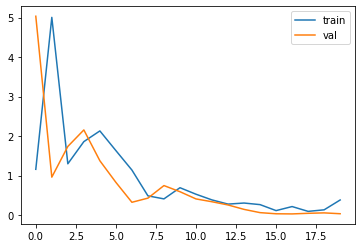

In [36]:
# plot
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])
plt.show()